In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# **1. Data/library Import**

In [ ]:
# 데이터 불러오기 라이브러리
import pandas as pd
import numpy as np
import random as rnd

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train(5).csv') # 모델 학습 데이터
test = pd.read_csv('/content/drive/MyDrive/test(5).csv') # 모델 테스트 데이터
submission = pd.read_csv('/content/drive/MyDrive/submission(5).csv')

In [ ]:
train.shape, test.shape, submission.shape

((1460, 81), (1459, 80), (1459, 2))

In [ ]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

*   타이타닉처럼 생존여부를 판단하는 Classification 문제가 아님
*   **집값을 예측하는 Regression 문제**

# **Data Dictionary**

* SalePrice - 부동산의 판매 가격(달러)입니다. 이것은 예측하려는 대상 변수
* MSSubClass : 건물 클래스
* MSZoning : 일반 zoning 분류
* LotFrontage : 부동산에 연결된 거리의 선형 피트
* LotArea : 평방 피트 단위의 부지 크기
* Street : 도로 접근 유형
* Alley : 골목 접근 방식
* LotShape : 속성의 일반적인 모양
* LandContour : 부동산의 평탄도
* Utilities : 사용 가능한 유틸리티 유형
* LotConfig : 로트 구성
* LandSlope : 속성의 기울기
* Neighborhood : Ames 시 경계 내의 물리적 위치
* Condition1 : 간선도로 또는 철도와 인접
* Condition2 : 간선도로 또는 철도와의 근접성(초가 있는 경우)
* BldgType : 주거 유형
* HouseStyle : 주거 스타일
* OverallQual : 전체 재질과 마감 품질
* OverallCond : 전체 상태 등급
* YearBuilt : 원래 건설 날짜
* YearRemodAdd : 리모델링 날짜
* RoofStyle : 지붕 유형
* RoofMatl : 지붕 재료
* Exterior1st : 주택의 외부 피복
* Exterior2nd : 주택의 외부 피복재(2개 이상의 재료인 경우)
* MasVnrType : 석조 베니어 유형
* MasVnrArea : 석조 베니어판 면적(제곱피트)
* ExterQual : 외장재 품질
* ExterCond : 외장재의 현황
* Foundation : 기초의 종류
* BsmtQual : 지하실 높이
* BsmtCond : 지하실의 일반 상태
* BsmtExposure : 파업 또는 정원 수준의 지하 벽
* BsmtFinType1 : 지하실 마감면적 품질
* BsmtFinSF1 : 1종 제곱피트 완성
* BsmtFinType2 : 두 번째 완성 영역의 품질(있는 경우)
* BsmtFinSF2 : 유형 2 완성 평방 피트
* BsmtUnfSF : 지하실의 미완성 평방 피트
* TotalBsmtSF : 지하 면적의 총 평방 피트
* HeatingQC : 난방의 종류
* HeatingQC : 난방 품질 및 상태
* CentralAir : 중앙 에어컨
* Electrical : 전기 시스템
* 1stFlrSF : 1층 평방피트
* 2ndFlrSF : 2층 평방피트
* LowQualFinSF : 저품질 마감 평방 피트(모든 층)
* GrLivArea : 지상(지상) 거실 면적 평방피트
* BsmtFullBath : 지하 전체 욕실
* BsmtHalfBath : 지하 반 화장실
* FullBath : 등급 이상의 전체 욕실
* HalfBath : 등급 이상의 반욕
* Bedroom : 지하층 이상의 침실 수
* Kitchen : 주방 수
* KitchenQual : 주방 품질
* TotRmsAbvGrd : 등급 이상의 총 방(화장실 제외)
* Functional : 홈 기능 등급
* Fireplaces : 벽난로의 수
* FireplaceQu : 벽난로 품질
* GarageType : 차고 위치
* GarageYrBlt : 차고 건설 연도
* GarageFinish : 차고 인테리어 마감
* GarageCars : 차고의 차고 크기
* GarageArea : 평방 피트의 차고 크기
* GarageQual : 차고 품질
* GarageCond : 차고 상태
* PavedDrive : 포장된 차도
* WoodDeckSF : 평방 피트의 목재 데크 면적
* OpenPorchSF : 평방 피트의 오픈 베란다 영역
* EnclosedPorch : 평방 피트의 닫힌 베란다 영역
* 3SsnPorch : 제곱피트의 3계절 베란다 면적
* ScreenPorch : 평방 피트의 스크린 베란다 면적
* PoolArea : 평방 피트의 수영장 면적
* PoolQC : 수영장 품질
* Fence : 울타리 품질
* MiscFeature : 다른 범주에서 다루지 않는 기타 기능
* MiscVal : 기타 기능의 $값
* MoSold : 월 판매
* YrSold : 년도 판매
* SaleType : 판매 유형
* SaleCondition : 판매 조건

In [ ]:
# 타깃 피처 'SalePrice' 정규분포 확인 

train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
# 수치형, 카테고리형 피처들 따로 저장

object_col = train.select_dtypes(include='object')	
int_col = train.select_dtypes(exclude='object')	
object_col.columns, int_col.columns

(Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SaleCondition'],
       dtype='object'),
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 

In [ ]:
# 회귀 문제이기 때문에 피처들의 분포 확인 중요
# 수치형 피처들의 비대칭도 확인

for col in int_col:
    print('{:15}'.format(col), '{:.2f}'.format(train[col].skew()))

Id              0.00
MSSubClass      1.41
LotFrontage     2.16
LotArea         12.21
OverallQual     0.22
OverallCond     0.69
YearBuilt       -0.61
YearRemodAdd    -0.50
MasVnrArea      2.67
BsmtFinSF1      1.69
BsmtFinSF2      4.26
BsmtUnfSF       0.92
TotalBsmtSF     1.52
1stFlrSF        1.38
2ndFlrSF        0.81
LowQualFinSF    9.01
GrLivArea       1.37
BsmtFullBath    0.60
BsmtHalfBath    4.10
FullBath        0.04
HalfBath        0.68
BedroomAbvGr    0.21
KitchenAbvGr    4.49
TotRmsAbvGrd    0.68
Fireplaces      0.65
GarageYrBlt     -0.65
GarageCars      -0.34
GarageArea      0.18
WoodDeckSF      1.54
OpenPorchSF     2.36
EnclosedPorch   3.09
3SsnPorch       10.30
ScreenPorch     4.12
PoolArea        14.83
MiscVal         24.48
MoSold          0.21
YrSold          0.10
SalePrice       1.88


*   음의 값을 가지면, 정규분포보다 오른쪽으로 치우쳐져 있고 왼쪽으로 긴 꼬리를 가지게 됨

*   양의 값을 가지면, 정규분포보다 왼쪽으로 치우쳐져 있고 오른쪽으로 긴 꼬리를 가지게 됨

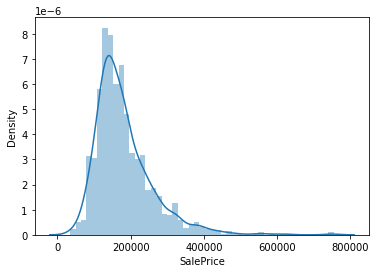

In [ ]:
# 타깃변수 Saleprice 정규분포 파악

sns.distplot(train['SalePrice'])


*   SalePrice 정규분포에서 벗어나 왼쪽으로 치우친 경향을 보임
*   **로그를 취해 정규분포를 따르도록 수정해 줄 필요가 있겠구나!**


# **2. EDA**

In [ ]:
# ID 를 행 index 로 설정

train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)
len_train_df = len(train)
len_test_df = len(test)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


**2.1 히트맵 확인**


*   수치형 변수들과 SalePrice 간의 상관관계 파악



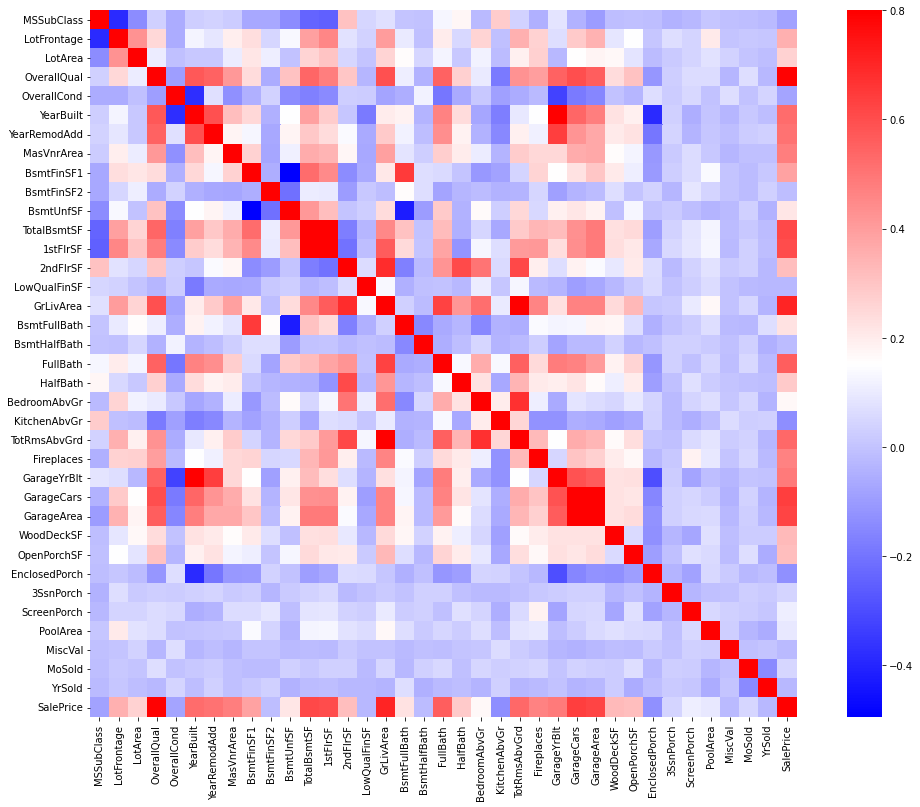

In [ ]:
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(train.corr(), vmax=.8, square=True, cmap='bwr')


**2.1.0. 다중 공선성 문제**
*   TotalBsmtSf (지하 면적의 총 평방 피트), 1stFlrSF (1층 평방 피트), 2ndFIrSF (2층 평방 피트) 피처들 사이 나타난 빨간 사각형
*   GarageYrBlt(차고가 건설된 해), GarageCars (차고 용량), GarageArea (차고 크기) 피처들 사이 나타난 빨간 사각형
*   이는 해당 피처들 간의 상관관계가 매우 높다는 의미로, **다중 공선성** 문제 (독립변수들 간에 강한 상관관계가 나타나는 현상) 발생 가능. 거의 동일한 정보를 제공해 주는 피처들이기 때문에 적절히 처리할 필요 있음 
*   이들 중 상관관계 가장 높게 나타난 하나의 변수만 택하는 방식으로 해결

**2.1.1. SalePrice 와의 연관도 파악** (연관도 0.3 이상 피처들)


*   OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea

*   **GarageCars, GarageArea**: 차량 크기나 차고 용량이나 두 데이터는 거의 같은 의미이기 때문에 두 데이터 중 하나 drop 시켜줄 필요 있음

*   TotRmsAbvGrd, FullBath: room, bathroom 관련 데이터 높은 연관성


*   YearBuilt, YearRemodAdd: 시간 관련 데이터 높은 연관성

In [ ]:
# correlation 0.3 이상 피처들만 뽑아내서 히트맵 생성

correlation_matrix = train.corr()
correlation_matrix.head()
x = correlation_matrix.index[abs(correlation_matrix["SalePrice"])>=0.3]
x

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

<Figure size 1296x936 with 0 Axes>

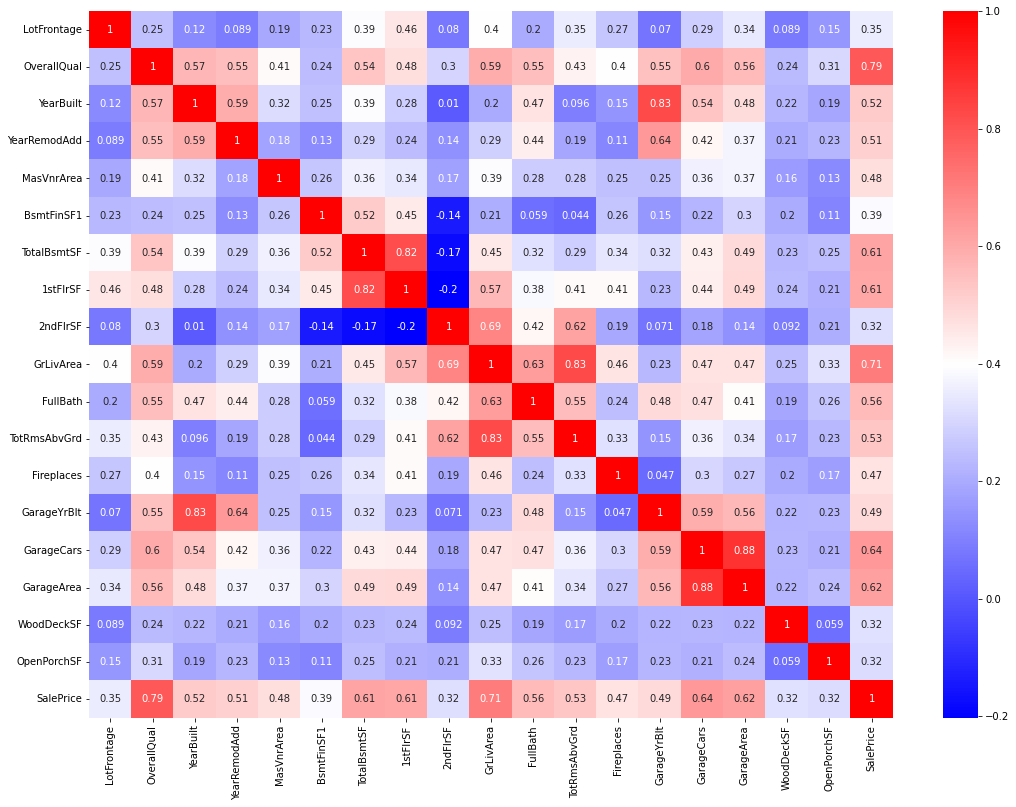

In [ ]:
plt.figure(figsize=(18,13))
sns.heatmap(data=train[x].corr(), annot=True, cmap='bwr')
plt.show()

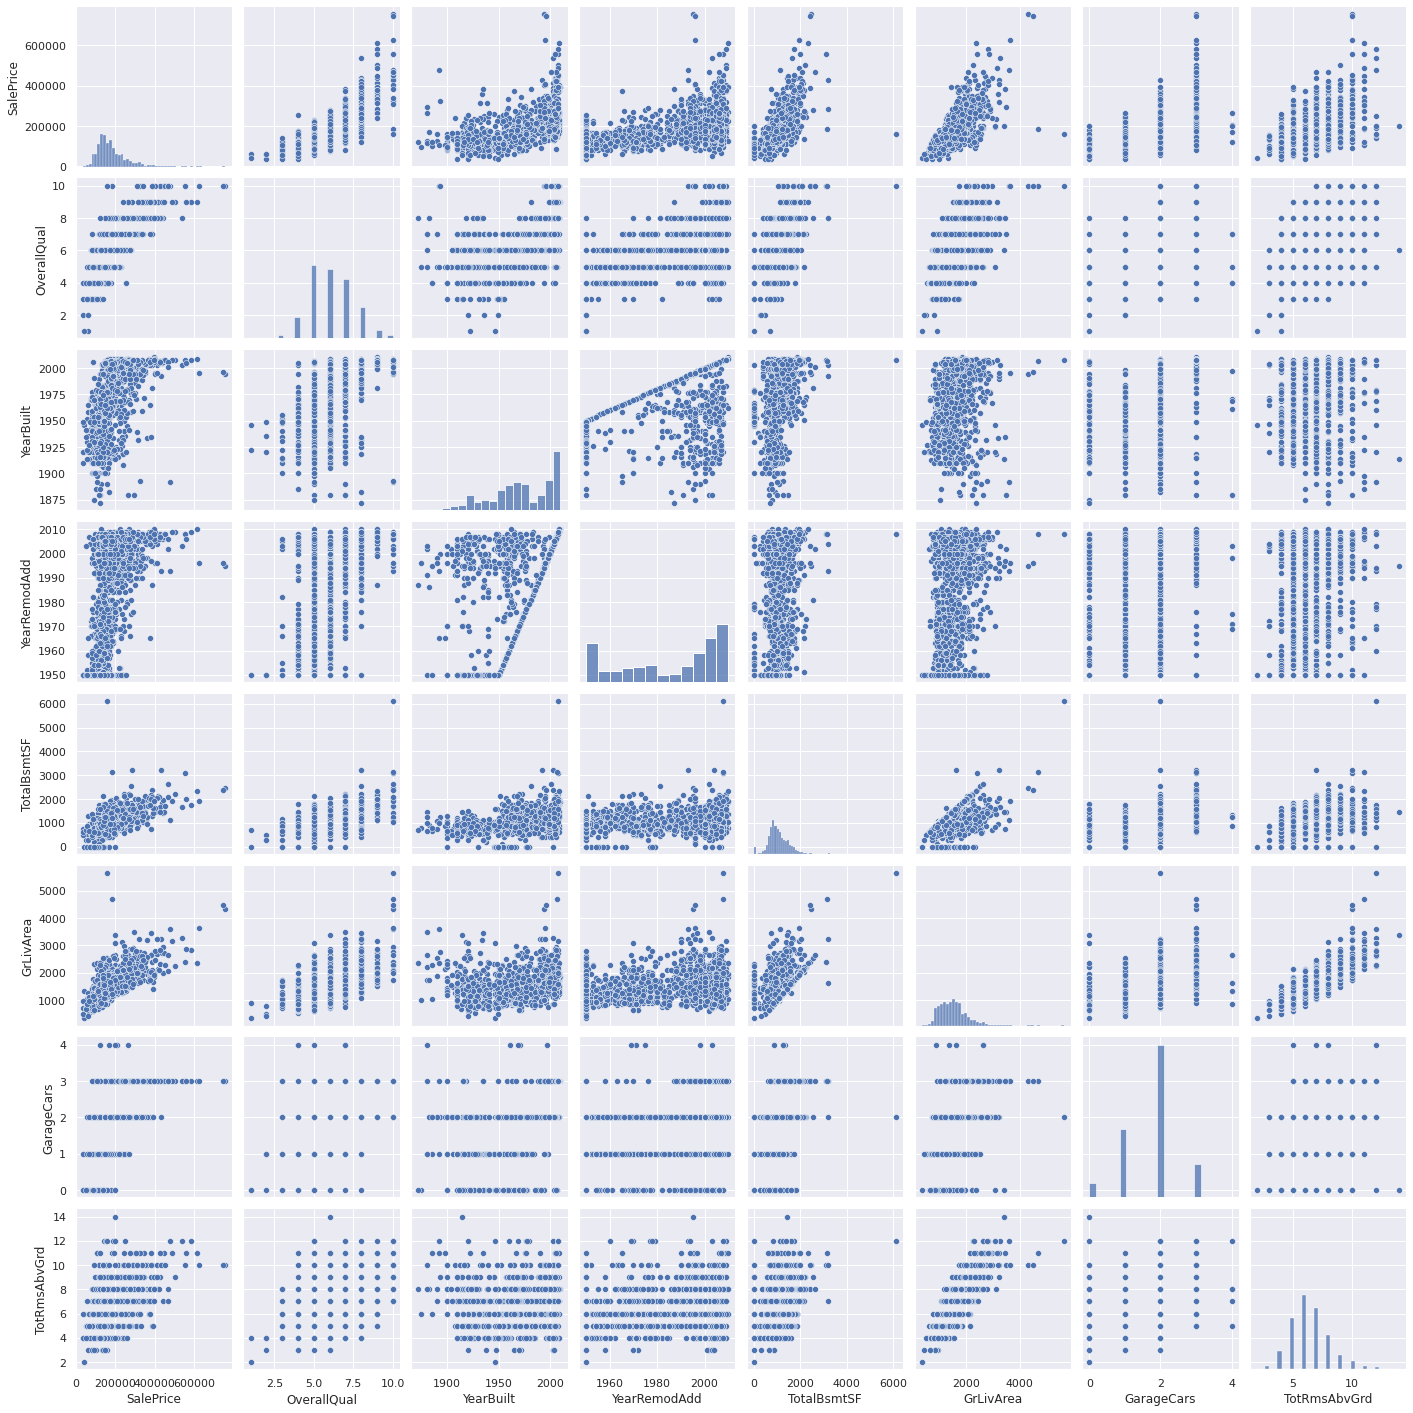

In [ ]:
# 산점도 매트릭스를 통해 자세한 분포 확인

sns.set()
cols = ['SalePrice','OverallQual', 'YearBuilt','YearRemodAdd', 'TotalBsmtSF','GrLivArea', 'GarageCars', 'TotRmsAbvGrd']
sns.pairplot(train[cols], size = 2.5)
plt.show()

*   **GrLivArea** (지상 생활공간 총 평방 피트) 와 **TotalBsmtSF** (지하 면적의 총 평방 피트) 간의 scattorplot 을 살펴보면 이 두 데이터는 선형적 관계를 보이고 있다는 것을 알 수 있음: 대부분의 집은 지상의 크기와 지하의 면적 크기가 같을 것이기 때문에 당연한 결과



*   YearBuilt 와 SalePrice 간의 scattorplot 을 살펴보면 최근으로 올수록 주택 가격이 빠르게 상승하는, 가속되는 경향을 보이고 있음


*   YearBuilt 와 YearRemodAdd 간의 선형관계에 주목하여 새로운 변수 뽑아낼 수 있음 ( YearBuilt = YearRemodAdd : 리모델링 여부 판단)

**2.2  boxplot 확인**

*   카테고리형 변수들과 타깃 피처 SalePrice 와의 상관관계 파악
*   Year 변수들과 타깃 피처 SalePrice 와의 상관관계 파악





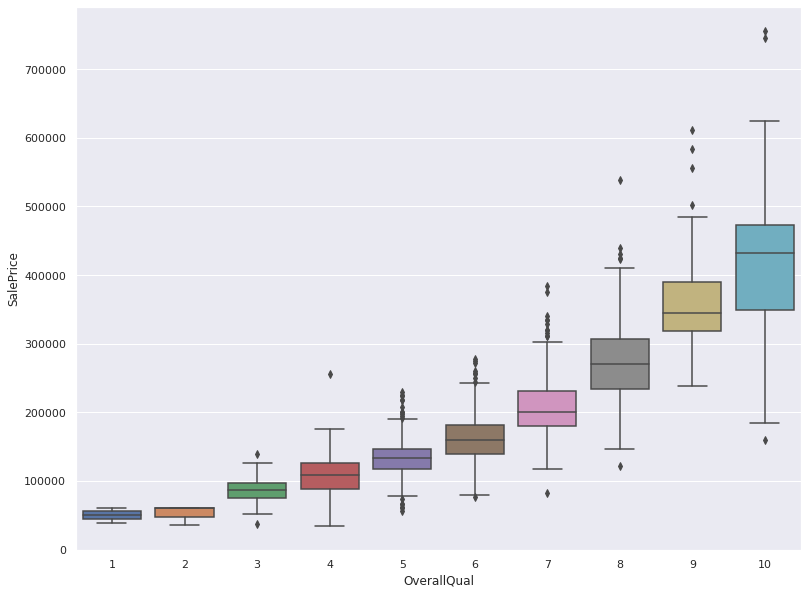

In [ ]:
# SalePrice 와 OverallQual(전체 재료 및 마지막 품질) 간의 관계 확인

data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(13, 10))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

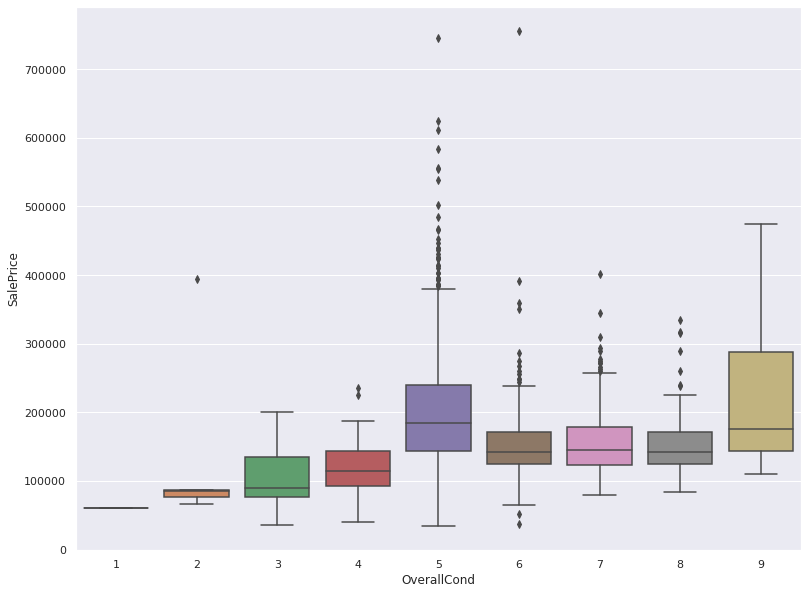

In [ ]:
# SalePrice 와 OverallQual(전체 상태 등급 간의 관계 확인)

data = pd.concat([train['SalePrice'], train['OverallCond']], axis=1)
f, ax = plt.subplots(figsize=(13, 10))
fig = sns.boxplot(x='OverallCond', y="SalePrice", data=data)


**OverallQual, OverallCond**
*   1~10 까지 집의 전반적인 상태를 Very Poor ~ Very Excellent 로 카테고리형 피처
*   집의 품질이 좋아질수록 가격이 높아지는 경향 (OverallQual 에서 더 뚜렷)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

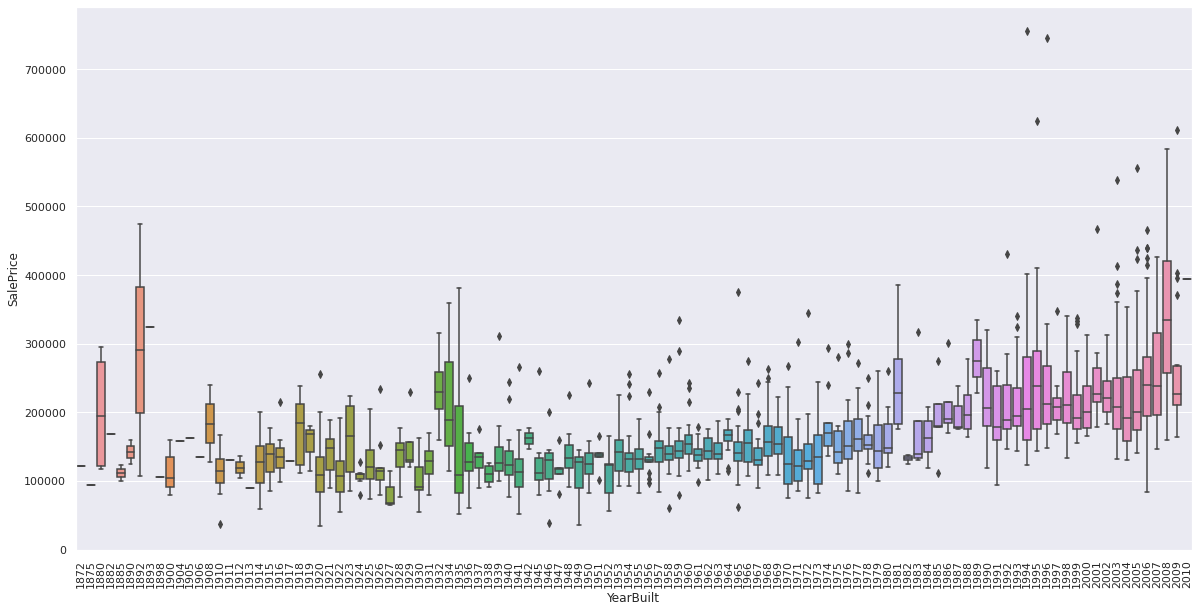

In [ ]:
# SalePrice 와 YearBuilt(최초 공사 일) 간의 관계 확인

data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text major ticklabel objects>)

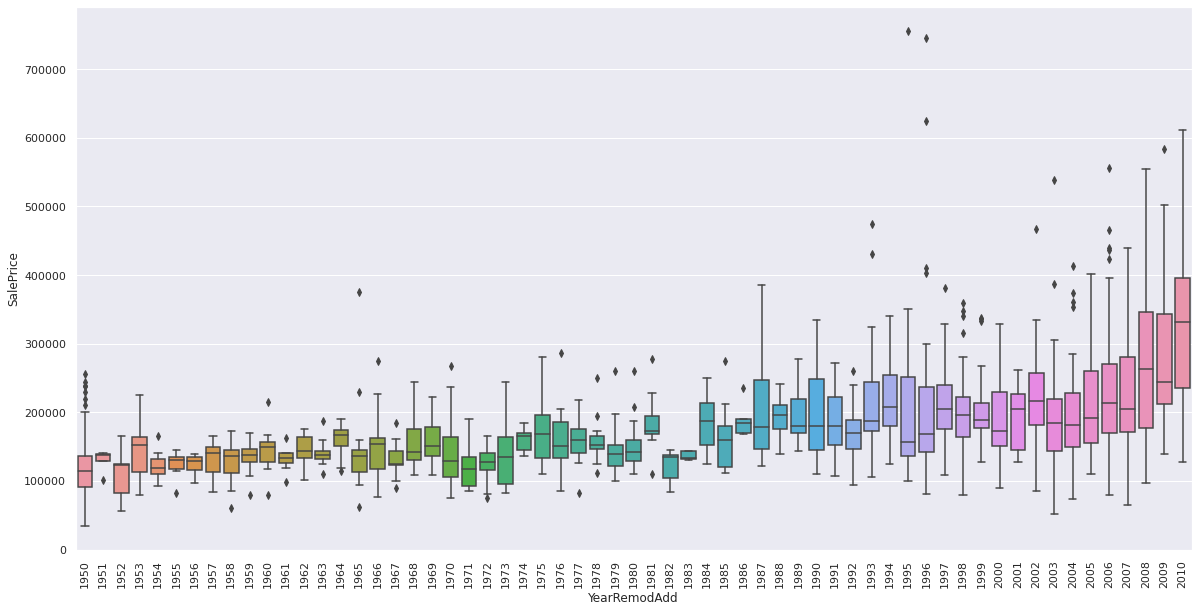

In [ ]:
# SalePrice 와 YearRemoded (리모델링 년도) 간의 관계 확인

data = pd.concat([train['SalePrice'], train['YearRemodAdd']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='YearRemodAdd', y="SalePrice", data=data)
plt.xticks(rotation=90)

*   최근에 지어지거나 혹은 리모델링을 진행한 주택일수록 가격이 증가하는 추세 관찰 가능

**2.3 이상치 제거**

*   주목할만한 수치형 변수들의 산점도 매트릭스를 확인하여 가격 예측에 방해가 될 위험이 있는 이상치 제거 진행



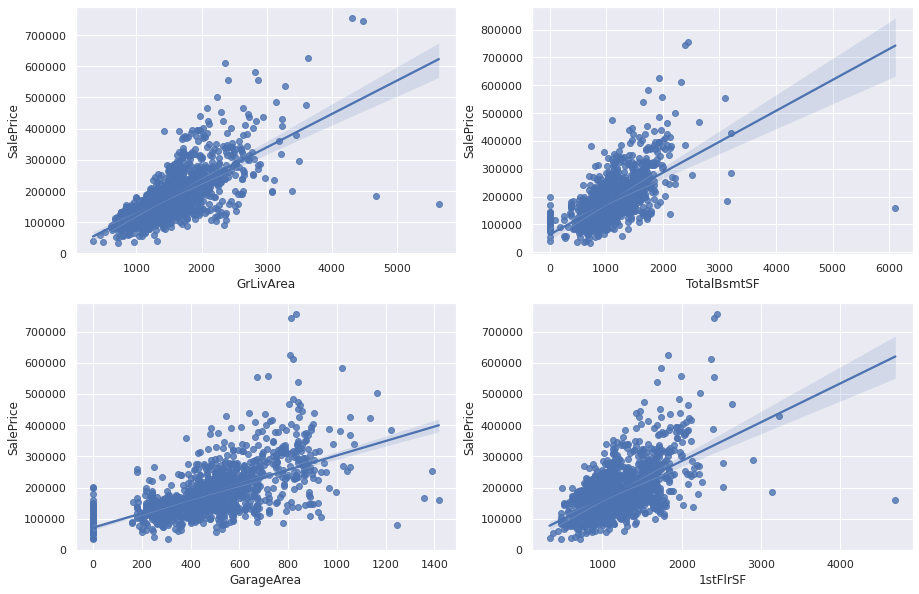

In [ ]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,10)
sns.regplot(train['GrLivArea'], train['SalePrice'], ax=ax1)
sns.regplot(train['TotalBsmtSF'], train['SalePrice'], ax=ax2)
sns.regplot(train['GarageArea'], train['SalePrice'], ax=ax3)
sns.regplot(train['1stFlrSF'], train['SalePrice'], ax=ax4)



*   GrLivArea, TotalBsmtSF 피처에 이상치 존재 확인
*   자세한 분포 확인 필요




Text(0, 0.5, 'SalePrice')

Text(0.5, 0, 'TotalBsmtSF')

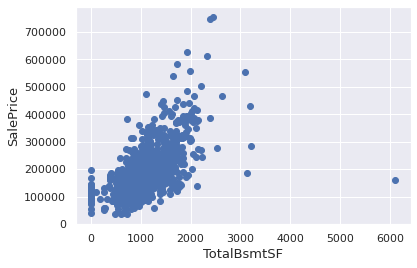

In [ ]:
# 산점도를 이용하여 SalePrice 와 TotalBsmtSF (지하 면적의 총 평방 피트) 간의 관계 확인

fig, ax = plt.subplots()
ax.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

*   1000~2000 사이에서 갑자기 가격 지수적 증가 형태를 보이는 경향
*   6000 이상의 값을 가지는 이상치 존재

In [ ]:
# 이상치 drop

train = train.drop(train[train['TotalBsmtSF']>3000].index)

Text(0, 0.5, 'SalePrice')

Text(0.5, 0, 'TotalBsmtSF')

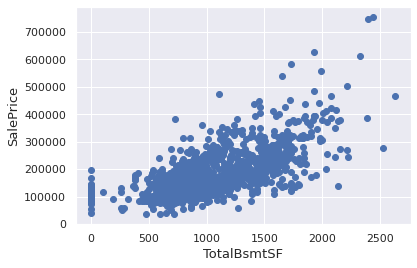

In [ ]:
# 제거 완료

fig, ax = plt.subplots()
ax.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

Text(0.5, 0, 'GrLivArea')

Text(0, 0.5, 'SalePrice')

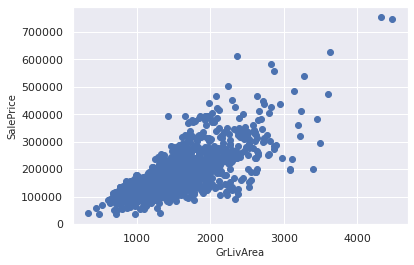

In [ ]:
# 산점도를 이용하여 SalePrice 와 GrLivArea (지상 생활면적 평방피트) 간의 관계 확인

fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=10)
plt.ylabel('SalePrice', fontsize=10)
plt.show()

*   전반적으로 선형적인 관계를 보이고 있으나 두 개의 이상치 존재

In [ ]:
# 두 개의 이상치 drop

train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Text(0.5, 0, 'GrLivArea')

Text(0, 0.5, 'SalePrice')

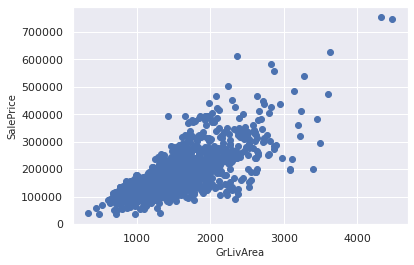

In [ ]:
# 제거 완료

fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=10)
plt.ylabel('SalePrice', fontsize=10)
plt.show()

*   GrLivArea, TotalBsmtSF 두 변수 모두 SalePrice 와 비례 관계에 놓여 있다는 것 알 수 있음
*   TotalBsmtSF 는 GrLivArea 와 비교하였을 때 더 가파른 기울기 가지고 있음

Text(0.5, 0, 'GarageArea')

Text(0, 0.5, 'SalePrice')

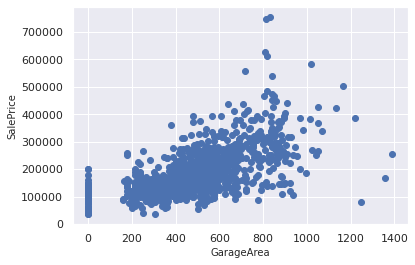

In [ ]:
# 산점도를 이용하여 SalePrice 와 GarageArea (지하 면적의 총 평방 피트) 간의 관계 확인

fig, ax = plt.subplots()
ax.scatter(train['GarageArea'], train['SalePrice'])
plt.xlabel('GarageArea', fontsize=10)
plt.ylabel('SalePrice', fontsize=10)
plt.show()

In [ ]:
# 이상치 drop

train = train.drop(train[train['GarageArea']>1200].index)

Text(0, 0.5, 'SalePrice')

Text(0.5, 0, '1stFlrSF')

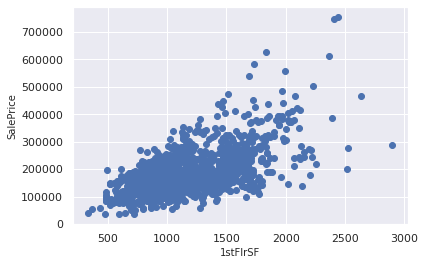

In [ ]:
# 산점도를 이용하여 SalePrice 와 1stFlrSF (지하 면적의 총 평방 피트) 간의 관계 확인

fig, ax = plt.subplots()
ax.scatter(train['1stFlrSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('1stFlrSF', fontsize=10)
plt.show()

In [ ]:
# 이상치 drop

train = train.drop(train[train['1stFlrSF']>2700].index)

Text(0, 0.5, 'SalePrice')

Text(0.5, 0, '2ndFlrSF')

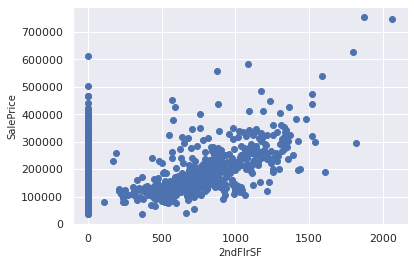

In [ ]:
# 산점도를 이용하여 SalePrice 와 2ndFlrSF (지하 면적의 총 평방 피트) 간의 관계 확인

fig, ax = plt.subplots()
ax.scatter(train['2ndFlrSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('2ndFlrSF', fontsize=10)
plt.show()

In [ ]:
# 이상치 drop

train = train.drop(train[train['2ndFlrSF']>1700].index)

# **3. Feature Engineering**


*   데이터 합치기
*   결측치 채우기
*   자료형 변환
*   새로운 피처 생성
*   Data Processing













**3.0 train/test concat**

원활한 feature engineering 을 위해 하나의 데이터 프레임으로 합치기 진행

In [ ]:
ccdata = train.drop(['SalePrice'],axis=1)
ccdata = pd.concat((ccdata,test),axis=0)
ccdata.shape

(2905, 79)

In [ ]:
target = train['SalePrice'] # 타깃 변수 따로 저장

**3.1 결측치 채우기**



*  **NA: No Basement** 인 경우 대부분
*  즉, 해당 피처에 결측값은 해당 시설이 존재하지 않음을 의미
*  null 비율 0.15 이상 피처들 drop
*  해당 피처의 정보를 다른 피처에서도 도출 가능한 피처들 drop






In [ ]:
t = ccdata.isnull().sum().sort_values(ascending=False)
p = (ccdata.isnull().sum()/ccdata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([t, p], axis=1, keys=['개수', '비율'])
missing_data.head(20)

,개수,비율
PoolQC,2897,0.997246
MiscFeature,2801,0.964200
Alley,2707,0.931842
Fence,2335,0.803787
FireplaceQu,1419,0.488468
LotFrontage,483,0.166265
GarageYrBlt,159,0.054733
GarageFinish,159,0.054733
GarageQual,159,0.054733
GarageCond,159,0.054733


**3.1.0 결측치 0.15 이상 피처 drop**

In [ ]:
drop = ccdata.isnull().sum() / len(ccdata)
drop[drop >= 0.15].keys()

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

*   **Alley**: 골목 접근 유형
*   **PoolQC**: Pool quality 데이터, 해당 항목에서 NA 는 수영장이 없는 것을 의미함. 즉 수영장이 없는 집이 대부분인 것이라고 해석할 수 있음.
*   **Fence**: Fence quality 데이터, 해당 항목에서 NA 는 울타리가 없는 것을 의미함. 즉 울타리가 없는 집이 대부분인 것이라고 해석할 수 있음.
*   **MiscFeature**: Elev, Gar2, Shed, TenC 라는 추가적인 고려 사항들이 존재하지만 대부분의 집들이 NA 값을 가지기 때문에 추가적으로 고려할 특징이 없는 것이라고 해석할 수 있음.
*   **LotFrontage**: 건물에 연결된 거리의 선형 피트
*   **FireplaceQu**: Fireplace quality 데이터, 해당 항목에서 NA 는 Fireplace 가 없는 것을 의미함. 즉 Fireplace 가 없는 집이 대부분인 것이라고 해석할 수 있음.
*   해당 데이터들은 대부분 특이사항을 의미하는 피처들이기 때문에 집의 가격을 결정할 때 중요하게 작용하는 변수들은 아닌 것으로 보임

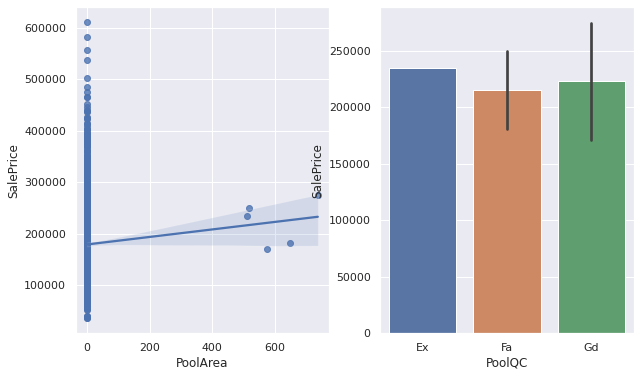

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(10,6)
sns.regplot(data=train, x='PoolArea', y='SalePrice', ax=ax1)
sns.barplot(data=train, x='PoolQC', y='SalePrice', ax=ax2)

*   대표적으로 Pool 수영장 관련 데이터를 살펴보면 대부분 0으로 데이터가 채워져 있는 것을 알 수 있음 
*   집에 수영장이 존재하는 것은 흔한 경우가 아니기 때문
*   따라서, 수영장이 있다는 것은 특이사항으로 분류할 수도 있으나 오히려 결측치가 많은 변수이기 때문에 drop 시켜주는 것이 옳다고 판단

In [ ]:
ccdata.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence','MiscFeature'],axis=1,inplace=True)

**3.1.1 동일 정보 다른 피처들에서 관찰 가능한 피처들 drop**

In [ ]:
ccdata.drop(['GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish','GarageQual',
             'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1',
             'MasVnrArea','MasVnrType'],axis=1,inplace=True)

*   차고 관련 데이터들은 총 8개
*   위 차트에서 **Garage** 관련 데이터들은 동일한 결측치 수 (159개) 를 가지고 있음
*   Garage 관련 데이터들은 GarageArea, GarageCars 로 충분히 설명이 가능하기 때문에 차고 관련 데이터들 중 결측치를 가진 피처는 drop 시켜줘도 정보 크게 손실되지 않음
*   **Bsmt** 관련 데이터들 역시 TotalBsmtSF 라는 데이터 하나로도 설명이 가능하기 때문에 결측치를 가진 데이터들 drop 시켜줘도 정보 크게 손실되지 않음
*   벽돌 관련 데이터인 **MasVnrArea** (제곱 피트의 벽돌 베니어 면적), MasVnrType (석조 베니어 타입) 은 각각 GrLivArea, OverallQual 에 해당 정보가 일부 포함되어 있다고 볼 수 있음. 따라서 해당 데이터 drop 시켜줘도 정보 크게 손실되지 않음 

**3.1.2 나머지 결측치들 fill**

In [ ]:
t = ccdata.isnull().sum().sort_values(ascending=False)
p = (ccdata.isnull().sum()/ccdata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([t, p], axis=1, keys=['개수', '비율'])
missing_data.head(20)

,개수,비율
MSZoning,4,0.001377
Functional,2,0.000688
BsmtFullBath,2,0.000688
BsmtHalfBath,2,0.000688
Utilities,2,0.000688
BsmtFinSF2,1,0.000344
Exterior2nd,1,0.000344
GarageCars,1,0.000344
GarageArea,1,0.000344
BsmtFinSF1,1,0.000344


In [ ]:
fillmode = ccdata.isna().sum() / len(ccdata)
fill_col = fillmode[fillmode > 0].keys()
fill_col

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea',
       'SaleType'],
      dtype='object')

In [ ]:
# 범주형 변수 최빈값으로 fill

for i in ['MSZoning','Utilities','Exterior1st','Exterior2nd', 'Electrical','KitchenQual','Functional','SaleType']:
  ccdata[i] = ccdata[i].fillna(ccdata[i].mode()[0])

In [ ]:
# 수치형 변수 0으로 fill

for i in ['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']:
  ccdata[i] = ccdata[i].fillna(0)

In [ ]:
# 결측치 제거 완료

t = ccdata.isnull().sum().sort_values(ascending=False)
p = (ccdata.isnull().sum()/ccdata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([t, p], axis=1, keys=['개수', '비율'])
missing_data.head(10)

,개수,비율
MSSubClass,0,0.0
CentralAir,0,0.0
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
LowQualFinSF,0,0.0
GrLivArea,0,0.0
BsmtFullBath,0,0.0
BsmtHalfBath,0,0.0
FullBath,0,0.0
HalfBath,0,0.0


**3.2 자료형 변환**


*   해당 데이터셋에는 카테고리형 변수들이 숫자로 표현되어 있는 경우가 존재
*   훈련 과정에서 모델이 이를 수치형 변수로 오해할 위험이 높기 때문에 str 형으로 형변환 진행





In [ ]:
# MSSubClass 변수는 판매 관련 주거 유형 카테고리를 수치로 표시한 것이기 때문에 카테고리형으로 형변환

ccdata.MSSubClass
ccdata.MSSubClass = ccdata.MSSubClass.astype(str)

Id
1        60
2        20
3        60
4        70
5        60
       ... 
2915    160
2916    160
2917     20
2918     85
2919     60
Name: MSSubClass, Length: 2905, dtype: int64

In [ ]:
# 판매년도와 월 또한 수치가 아닌 카테고리형으로 형변환

ccdata.YrSold = ccdata.YrSold.astype(str)
ccdata.MoSold = ccdata.MoSold.astype(str)

**3.3 새로운 피처 생성**

*  연관된 변수들로부터 새로운 데이터 생성
*  하나의 값의 빈도가 과하게 많은 변수들 drop



**3.3.1 연관 정보들로부터 새로운 피처 생성**

In [ ]:
# 1. GarageArea 변수를 이용하여 차고 유무 판단 변수 생성

ccdata['Garage'] = np.where(ccdata['GarageArea'] > 0, 1, 0) 

In [ ]:
# 2. Original construction data 와 Remodel date 비교하여 최근 리모델링 진행 여부 판단 변수 생성

ccdata['Remodeling'] = np.where(ccdata['YearBuilt'] != ccdata['YearRemodAdd'], 1, 0) 

In [ ]:
# 3. 외국 주택에는 halfbathroom 라고 불리는 작은 화장실이 존재
# bath 관련 데이터의 총합을 통해 총 화장실 수 변수 생성

ccdata['Bathroom'] = ccdata['BsmtFullBath'] + ccdata['BsmtHalfBath'] + ccdata['FullBath'] + ccdata['HalfBath']

In [ ]:
# 4. TotalBsmtSF 변수를 통해 지하칠 존재 여부 판단 변수 생성

ccdata['BsmtIs']  = np.where(ccdata['TotalBsmtSF']>0,1,0)

In [ ]:
# 5. 주택 면적 관련 데이터들의 총합으로 총 주택 면적 판단 변수 생성

ccdata['Size'] = ccdata['1stFlrSF'] + ccdata['2ndFlrSF'] + ccdata['TotalBsmtSF'] 

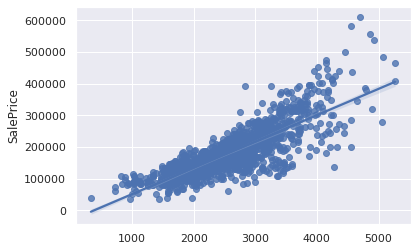

In [ ]:
sns.regplot(train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'], train['SalePrice'])



*   train 데이터에서 살펴보면 총 주택 면적 판단 변수가 SalePrice와 선형관계에 놓여 있다는 것을 알 수 있음
*   즉, **총 주택 면적이 증가하면 SalePrice 역시 증가하는 형태**





In [ ]:
# 6. Condition1, 2 피처에서 근처 지하철역 존재 여부 판단 변수 생성

ccdata['Subway'] = np.where((ccdata['Condition1']=='RRAn')|(ccdata['Condition1']=='PosA')|
                             (ccdata['Condition1']=='RRAe')|(ccdata['Condition2']=='PosA')|
                            (ccdata['Condition2']=='RRAn')|(ccdata['Condition2']=='RRAe'),1,0)





*   물론, 근처에 Rail Road 이 있다는 것이 지하철역 근처라는 사실로 직결되는 것은 아니지만 지하철역이 존재할 가능성이 높기 때문에 해당 피처 생성





In [ ]:
# 7. Condition1, 2 피처에서 근처 공원 존재 여부 판단 변수 생성

ccdata['park'] = np.where((ccdata['Condition1']=='PosN')|
                            (ccdata['Condition2']=='PosN'),1,0)

**3.4 하나의 값이 과도하게 많은 경우 drop**

In [ ]:
ccdata['Street'].value_counts()
print("\n")
ccdata['Condition2'].value_counts()
print("\n")
ccdata['Utilities'].value_counts()
print("\n")
ccdata['Heating'].value_counts()
print("\n")
ccdata['RoofMatl'].value_counts()

Pave    2894
Grvl      11
Name: Street, dtype: int64

Norm      2877
Feedr       13
Artery       5
PosA         4
RRNn         2
PosN         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

AllPub    2904
NoSeWa       1
Name: Utilities, dtype: int64

GasA     2860
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

CompShg    2865
Tar&Grv      23
WdShake       8
WdShngl       6
Metal         1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [ ]:
ccdata.drop(columns=['Street','Heating','Condition2','Utilities','RoofMatl'],inplace=True)

**3.5 Data Preprocessing (Numeric Feature)**

*   타깃 피처 로그 변환
*   독립 피처 로그 변환



**3.5.1 타깃 피처 로그 변환**

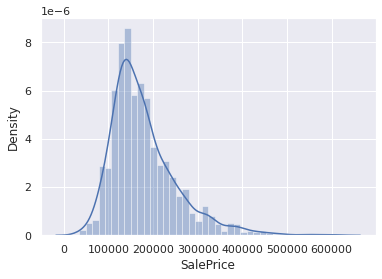

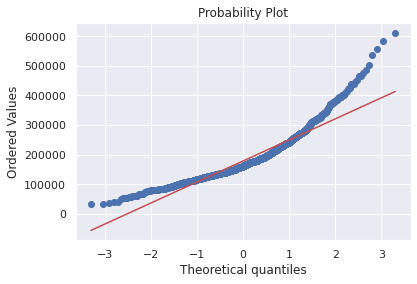

In [ ]:
# 히스토그램으로 타깃 변수 첨도/왜도 확인
# 타깃 변수의 데이터 분포는 정규 분포를 나타내는 곡선을 거의 따라야 함
# 그러나 타깃 변수 SalePrice 정규분포를 따르지 않기 때문에 정확도 낮아지게 만들 위험 존재

sns.distplot(target)
fig = plt.figure()
res = stats.probplot(target, plot=plt)

*   왼쪽 부분에 데이터가 몰려 있음
*   오른쪽 꼬리 부분은 데이터가 적기 떄문에 적절한 학습이 이루어지지 않을 위험 존재
*   가격이 0 인 데이터가 없기 때문에 로그 변환 진행하여 정규화 따를 수 있도록 수정

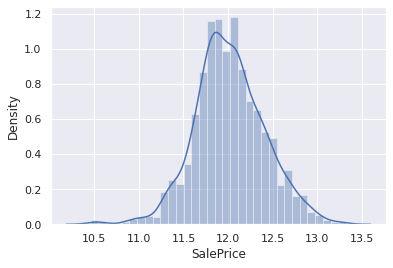

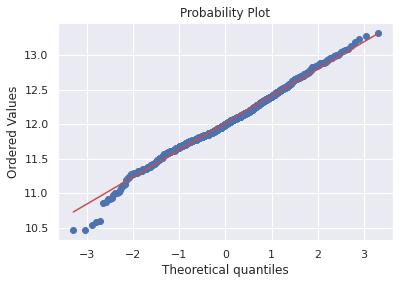

In [ ]:
# 정규화 시켜주기 위해 로그 변환 수행

target = np.log1p(target) # log0 (무한대로 발산) 나오는 경우 방지 위해 log1p 변환
sns.distplot(target)
fig = plt.figure()
res = stats.probplot(target, plot=plt)

**3.5.2 독립 피처 로그 변환**

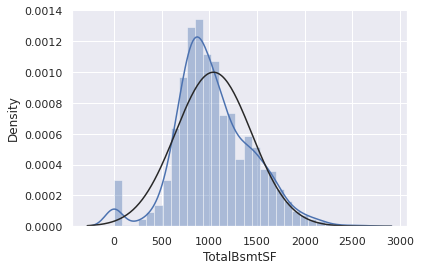

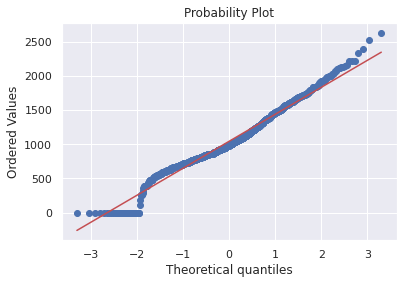

In [ ]:
# TotalBsmtSF (지하 면적의 총 평방 피트) 을 새로운 변수로 변환


sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

*   해당 데이터는 0 값이 존재하기 때문에 로그 변환이 불가
*   따라서 지하실 존재여부를 판단할 수 있는 변수 이용하여 변환

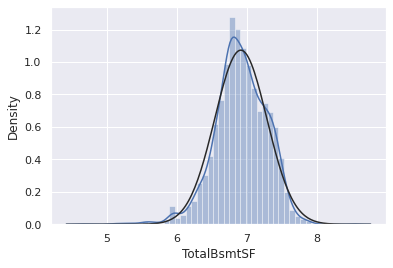

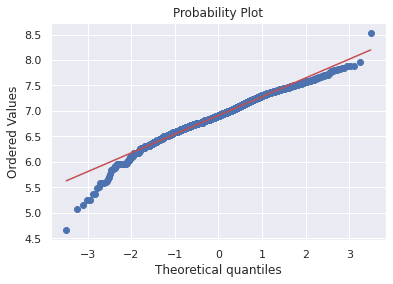

In [ ]:
# 지하실 있는 주택의 지하실 평방 피트 데이터만 로그 변환

ccdata.loc[ccdata['BsmtIs']==1,'TotalBsmtSF'] = np.log(ccdata['TotalBsmtSF'])
sns.distplot(ccdata[ccdata['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(ccdata[ccdata['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [ ]:
# 수치형, 카테고리형 피처들 따로 저장

object_col = ccdata.select_dtypes(include='object')	
int_col = ccdata.select_dtypes(exclude='object')	
object_col.columns, int_col.columns

(Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
        'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
        'Foundation', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType',
        'SaleCondition'],
       dtype='object'),
 Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'Garage', 'Remodeling', 'Bathroom', 'BsmtIs', 'Size', 'Subway', 'park'],
       dtype='object'))

In [ ]:
# 회귀 문제이기 때문에 피처들의 분포 확인 중요
# 수치형 피처들의 비대칭도 확인

for col in int_col:
    print('{:15}'.format(col), '{:.2f}'.format(ccdata[col].skew()))

LotArea         13.25
OverallQual     0.17
OverallCond     0.56
YearBuilt       -0.59
YearRemodAdd    -0.45
BsmtFinSF1      0.98
BsmtFinSF2      4.17
BsmtUnfSF       0.91
TotalBsmtSF     -4.97
1stFlrSF        1.21
2ndFlrSF        0.83
LowQualFinSF    12.07
GrLivArea       0.95
BsmtFullBath    0.63
BsmtHalfBath    3.94
FullBath        0.15
HalfBath        0.70
BedroomAbvGr    0.33
KitchenAbvGr    4.29
TotRmsAbvGrd    0.75
Fireplaces      0.73
GarageCars      -0.23
GarageArea      0.16
WoodDeckSF      1.86
OpenPorchSF     2.53
EnclosedPorch   4.02
3SsnPorch       11.35
ScreenPorch     3.95
PoolArea        18.68
MiscVal         21.92
Garage          -3.93
Remodeling      0.14
Bathroom        0.49
BsmtIs          -5.82
Size            0.89
Subway          5.08
park            8.70



*   MiscVal > PoolArea > LotArea > LowQualFinSF > 3SsnPorch 순으로 비대칭성이 높음

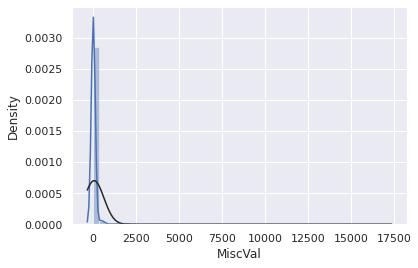

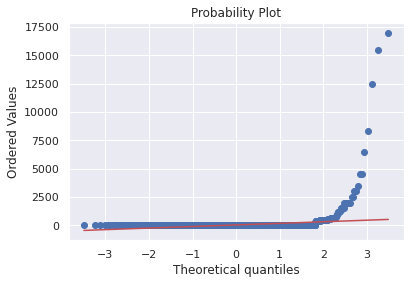

In [ ]:
# MiscVal 비대칭성 확인

sns.distplot(ccdata['MiscVal'], fit=norm);
fig = plt.figure()
res = stats.probplot(ccdata['MiscVal'], plot=plt)



*   왜도가 양의 값을 보이기 때문에 왼쪽으로 쏠린 분포 생성



In [ ]:
# 로그 변환 진행

ccdata['MiscVal'] = np.log1p(ccdata['MiscVal'])
ccdata['PoolArea'] = np.log1p(ccdata['PoolArea'])
ccdata['LotArea'] = np.log1p(ccdata['LotArea'])
ccdata['LowQualFinSF'] = np.log1p(ccdata['LowQualFinSF'])
ccdata['3SsnPorch'] = np.log1p(ccdata['3SsnPorch'])
ccdata['KitchenAbvGr'] = np.log1p(ccdata['KitchenAbvGr'])
ccdata['BsmtFinSF2'] = np.log1p(ccdata['BsmtFinSF2'])
ccdata['EnclosedPorch'] = np.log1p(ccdata['EnclosedPorch'])
ccdata['ScreenPorch'] = np.log1p(ccdata['ScreenPorch'])
ccdata['BsmtHalfBath'] = np.log1p(ccdata['BsmtHalfBath'])
ccdata['OpenPorchSF'] = np.log1p(ccdata['OpenPorchSF'])
ccdata['WoodDeckSF'] = np.log1p(ccdata['WoodDeckSF'])
ccdata['1stFlrSF'] = np.log1p(ccdata['1stFlrSF'])

**3.6 Data Preprocessing (Categorical Feature)**

In [ ]:
ccdata.shape

(2905, 63)

In [ ]:
# One-Hot Encoding 진행

ccdata = pd.get_dummies(ccdata)
ccdata.shape

(2905, 231)

# **4. Modeling & Validation**

**4.1 train/test set 분할**

In [ ]:
train.shape, test.shape

((1446, 80), (1459, 79))

In [ ]:
train_df = ccdata[:train.shape[0]]
test_df = ccdata[train.shape[0]:]
train_df.shape,test_df.shape

((1446, 231), (1459, 231))

In [ ]:
Xtrain = train_df
Xtest =  test_df
Ytrain = target

**4.2 Import Library**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import , Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score, GridSearchCV # k-fold 교차검증
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

**4.3 KFold 교차검증**



*   데이터셋 4 부분으로 분할하여 검증



In [ ]:
kfold = KFold(n_splits=4)
random_state=1
regmodel = [] 



**LASSO** L1 규제 적용한 선형회귀모델



In [ ]:
regmodel.append(Lasso(random_state = random_state))

**RIDGE** L2 규제 적용한 선형회귀모델

In [ ]:
regmodel.append(Ridge(random_state = random_state))



**ElasticNet**
선형 회귀에 L1 규제와 L2 규제 함께 사용



In [ ]:
regmodel.append(ElasticNet(random_state = random_state))

In [ ]:
regmodel.append(SVR())

In [ ]:
regmodel.append(LGBMRegressor(verbose_eval=False,random_state = random_state))

In [ ]:
regmodel.append(XGBRegressor(silent=True,random_state=random_state))

In [ ]:
regmodel.append(GradientBoostingRegressor(random_state=random_state))

In [ ]:
regmodel.append(RandomForestRegressor(random_state=random_state))

In [ ]:
scores = []
i = 0
for model in regmodel:
  print('모델 별 점수', round(np.mean(cross_val_score(model, train_df, y = target, cv=3)),3))

모델 별 점수 0.808
모델 별 점수 0.909
모델 별 점수 0.823
모델 별 점수 0.77
모델 별 점수 0.893
모델 별 점수 0.898
모델 별 점수 0.896
모델 별 점수 0.88


**neg_mean_squared_error**

교차 검증은 scoring 매개변수에 클수록 좋은 효용 함수 기대, 따라서 평균 제곱 오차 (작을수록 좋음) 의 반대값을 계산하는 'neg_mean_squared_error' 점수 측정하여 모델 선별

In [ ]:
results = []

for model in regmodel:
  results.append(np.mean(np.sqrt(-cross_val_score(model, train_df, y = target, scoring = 'neg_mean_squared_error',
                                       cv = kfold, n_jobs=-4))))

In [ ]:
Model = ['Lasso','Ridge','ElasticNet','SVR','LGBMRegressor','XGBRegressor','GradientBoostingRegressor','RandomForestRegressor']

pd.DataFrame({'Model':Model,'Result':results})

,Model,Result
0,Lasso,0.170606
1,Ridge,0.113069
2,ElasticNet,0.164061
3,SVR,0.185492
4,LGBMRegressor,0.125062
5,XGBRegressor,0.122733
6,GradientBoostingRegressor,0.121382
7,RandomForestRegressor,0.133226



*   **Ridge, LGBMRegressor, XGBRegressor, GradientBoostingRegressor, RandomForest** 모델 선택



**4.4 GridSearchCV**

GridSearchCV 이용한 하이퍼파라미터 튜닝


*   파라미터 값으로 입력할 수 있는 후보가 많을 때, 모든 조합 입력해 보면서 최적의 파라미터 찾는 방법


**4.4.1 Ridge model**

In [ ]:
model=Ridge()

ridg_param_grid ={

'alpha':[0.001,0.01, 0.1, 1, 10],

}

grid_ridg = GridSearchCV(model,param_grid = ridg_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
grid_ridg.fit(train_df,target)
ridg_best = grid_ridg.best_estimator_

Fitting 4 folds for each of 5 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Ridge(), n_jobs=4,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
grid_ridg.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__alpha', 'estimator__copy_X', 'estimator__fit_intercept', 'estimator__max_iter', 'estimator__normalize', 'estimator__positive', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [ ]:
grid_ridg.best_score_

-0.012453251245243574

In [ ]:
ridg_best

Ridge(alpha=10)

**4.4.2 LGBMRegressor**

In [ ]:
model = LGBMRegressor()
lgb_param_grid = {
    'learning_rate': [1,0.1,0.01,0.001],
    'n_estimators': [50, 100, 200, 500, 1000,5000], 
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4]
}
grid_lgb = GridSearchCV(model,param_grid = lgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
grid_lgb.fit(train_df,target)
lgb_best = grid_lgb.best_estimator_

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LGBMRegressor(), n_jobs=4,
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001],
                         'max_depth': [15, 20, 25],
                         'min_split_gain': [0.3, 0.4],
                         'n_estimators': [50, 100, 200, 500, 1000, 5000],
                         'num_leaves': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
grid_lgb.best_score_

-0.018706965356580972

In [ ]:
lgb_best

LGBMRegressor(max_depth=15, min_split_gain=0.3, n_estimators=50, num_leaves=50)

**4.4.3 GradientBoostingRegressor**

In [ ]:
model = GradientBoostingRegressor()
gb_param_grid = {
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
#neg_mean_squared_error
grid_gbr = GridSearchCV(model,param_grid = gb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
grid_gbr.fit(train_df,target)
gbc_best = grid_gbr.best_estimator_
grid_gbr.best_score_

Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=GradientBoostingRegressor(), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [4, 8], 'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

-0.016802385727873317

In [ ]:
grid_gbr.best_score_

-0.016802385727873317

In [ ]:
gbc_best

GradientBoostingRegressor(max_depth=8, max_features=0.3, min_samples_leaf=100,
                          n_estimators=300)

**4.4.4 XGBRegressor**

In [ ]:
import xgboost

In [ ]:
# XGBRegressor 모델에서도 GridSearch 진행하려고 했으나 오류가 발생하여 manual Search 로 진행

model = XGBRegressor()
lgb_param_grid = {
    "min_child_weight":[1.0,1.2]
    ,'max_depth': [3,4,6,7,8,9,10], 
    'n_estimators': [500,1000,1500,2000,250]
}
#grid_xgb = GridSearchCV(model,param_grid = lgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
grid_xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
grid_xgb.fit(train_df,target)
xgb_best = grid_xgb

[02:57:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

In [ ]:
xgb_best

XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

**4.4.5 RandomForest**

In [ ]:
model = RandomForestRegressor()
rf_param_grid = {
        'n_estimators' : [10,20,30],
        'max_depth' : [6, 8, 10, 12],
        'min_samples_leaf' : [8,12,18],
        'min_samples_split' : [8, 16, 20],
        'max_features': [0.4, 0.6, 0.8, 1] 
}
grid_rf = GridSearchCV(model,param_grid = rf_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
grid_rf.fit(train_df,target)
rf_best = grid_rf.best_estimator_

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'max_features': [0.4, 0.6, 0.8, 1],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 20, 30]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
grid_rf.best_score_

-0.019418561846787762

In [ ]:
rf_best

RandomForestRegressor(max_depth=10, max_features=0.6, min_samples_leaf=8,
                      min_samples_split=8, n_estimators=30)

# **5 Application/Prediction**

**5.1 앙상블**


*   다양한 예측 결과 결합함으로써 단일 분류기보다 더 정확한 최종 예측 도출 (집단지성 st)


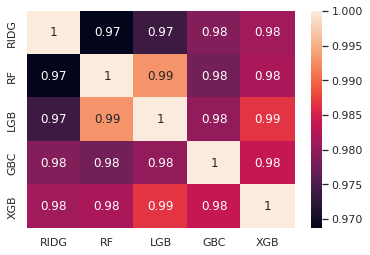

In [ ]:
test_RIDG = pd.Series(ridg_best.predict(test_df),name='RIDG')
test_GBC = pd.Series(gbc_best.predict(test_df), name="GBC")
test_RF = pd.Series(rf_best.predict(test_df), name="RF")
test_LGB = pd.Series(lgb_best.predict(test_df), name="LGB")
test_XGB = pd.Series(xgb_best.predict(test_df), name="XGB")
ensemble_results = pd.concat([test_RIDG, test_RF,test_LGB,test_GBC,test_XGB],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [ ]:
ensemble = np.expm1(0.6*test_RIDG+0.1*test_GBC + 0.1*test_RF + 0.1*test_LGB+0.1*test_XGB)
submission = pd.read_csv('/content/drive/MyDrive/submission(5).csv')
price = submission.copy() 
price['SalePrice'] = ensemble
priceㅎ                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
price.to_csv('result_ensemble.csv',index=False) # 제출 파일 저장

,Id,SalePrice
0,1461,122947.914473
1,1462,160809.907631
2,1463,180038.524855
3,1464,194867.994432
4,1465,191037.970869
...,...,...
1454,2915,87700.113598
1455,2916,84022.101700
1456,2917,163272.535550
1457,2918,118840.111572


**5.2 보팅(Voting)**

*   서로 다른 알고리즘을 가진 분류기의 조합으로 최종 예측 값 도출




In [ ]:
from sklearn.ensemble import VotingRegressor

votingC = VotingRegressor(estimators=[('RIDGE',ridg_best),('LGB', lgb_best), ('GBC',gbc_best), ('RF', rf_best),('XGB',xgb_best)], n_jobs=4)
votingC = votingC.fit(train_df,target)

In [ ]:
test_SP = pd.Series(votingC.predict(test_df), name="SalePrice")

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/submission(5).csv')
price = submission.copy() 
price
price['SalePrice'] = np.expm1(test_SP)
price
price.to_csv('result_voting.csv',index=False) # 제출 파일 저장

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


,Id,SalePrice
0,1461,123065.328132
1,1462,161498.006251
2,1463,180240.191367
3,1464,189336.132519
4,1465,187021.591045
...,...,...
1454,2915,86567.738390
1455,2916,85723.048166
1456,2917,163759.458946
1457,2918,119338.278200


**5.3 모델 예측값들의 평균** 

모델 예측값들의 평균을 통해 최종 결과 도출 (ElasticNet 모델 추가)

In [ ]:
# ElasticNet 하이퍼파라미터

model=ElasticNet()

ElasticNet_param_grid ={

'alpha':[0.0001,0.001,0.01, 0.1, 1, 10],

}

grid_ElasticNet = GridSearchCV(model,param_grid = ElasticNet_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
grid_ElasticNet.fit(train_df,target)
ElasticNet_best = grid_ElasticNet.best_estimator_

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=ElasticNet(), n_jobs=4,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
ElasticNet_best

ElasticNet(alpha=0.001)

In [ ]:
test_RIDG = ridg_best.predict(test_df)
test_GBC = gbc_best.predict(test_df)
test_RF = rf_best.predict(test_df)
test_LGB = lgb_best.predict(test_df)
test_ENet = ElasticNet_best.predict(test_df)
test_XGB = xgb_best.predict(test_df)

In [ ]:
model_predictions = (test_RIDG + test_GBC + test_RF + test_LGB + test_ENet)/5
#test_XGB
predictions=np.exp(model_predictions)-1
submission['SalePrice']=predictions
submission
submission.to_csv('result_mean.csv',index=False)

,Id,SalePrice
0,1461,123920.566957
1,1462,161913.229201
2,1463,178555.727505
3,1464,192689.092415
4,1465,187761.681859
...,...,...
1454,2915,88198.436704
1455,2916,85797.374906
1456,2917,162723.956891
1457,2918,118349.208947


In [ ]:
predictions.shape

(1459,)

# **6. Kaggle 참여 결과/총 정리**

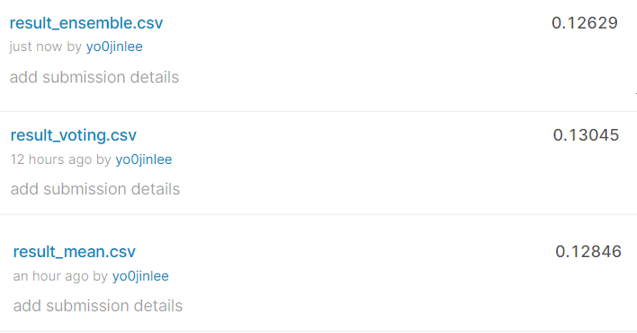


*   **앙상블 기법 0.12629**

*   보팅 기법 0.13045

*   평균 예측 0.12846

*   앙상블 기법의 캐글 결과가 보팅 기법, 평균 도출을 통해 예측 진행한 것과 비교하였을 때 가장 좋음


*   앙상블 기법으로 도출한 결과를 최종 예측 결과로 선택하여 제출



# **더 추가했다면 좋았을 데이터**




*   해당 데이터셋의 대부분은 주택의 건축/구조적인 측면에 관한 정보들을 많이 담고 있으며 주변의 환경이나 교통 정보와 같은 물리적인 정보들은 빈약함

*   Neighborhood, Condition1/2 라는 피처로 일부 위치 정보를 제공하고 있으나, 해당 데이터가 미국의 주택의 가격을 예측하는 것이기 때문에 주변 환경에 대한 데이터가 미국의 지명이나 Meadow Village, Timberland 처럼 단순한 장소로 주어짐 


*   그러나, 부동산 가격을 결정할 때 주변 환경과 같은 요소들이 주택의 내부적인 요소들만큼이나 중요한 영향 미칠 가능성 높음


*   따라서 **주변 환경**/**교통 정보**/**위치 정보**/**접근성**/**보안**/**상권** 과 같은 외부적인 데이터들이 보다 구체적으로 주어졌더라면 부동산 가격을 예측하는 데에 더 도움이 됐을 것으로 보임.

